In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns 
import plotnine as gg 
from plotnine import ggplot

In [36]:
all_data = pd.read_csv('all_data.csv')
all_data


,trial_order,participant_ID,stim_id,condition,freq_category,word,subtlex_log10freq,stim_duration,start_time,end_time,key,reaction_time,accuracy,age,sex
0,0,10,3,rw,LF,imams,0.3010,0.653968,49.665223,51.236046,z,1.570823,1,32,male
1,1,10,89,rw,HF,geweest,4.3568,0.777914,52.780841,54.769429,m,1.988588,0,32,male
2,2,10,73,rw,HF,gemaakt,4.0844,0.800839,56.313787,57.639819,z,1.326032,1,32,male
3,3,10,193,nw,NW,nef,0.0000,0.425873,59.178713,60.335519,m,1.156806,1,32,male
4,4,10,125,nw,NW,kabrieken,0.0000,0.544626,61.877767,63.301171,m,1.423404,1,32,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,195,13,14,rw,LF,juffen,0.4771,0.444512,568.440793,569.310328,z,0.869534,1,28,female
796,196,13,63,rw,HF,begin,3.9267,0.479478,570.855868,571.966882,z,1.111014,1,28,female
797,197,13,157,nw,NW,udel,0.0000,0.356304,573.505520,574.714815,m,1.209294,1,28,female
798,198,13,165,nw,NW,tombel,0.0000,0.447211,576.254594,578.591263,m,2.336669,1,28,female


Task:
- Calculate some summary statistics, and verify that the results
look sensible. 
- Then, use a plotting package of your choice to visualise results. 
    - Make (at least) one diagnostic plot, with (relatively) raw data, as a check to see that the data actually
looks sensible, 
    - and (at least) one aggregate plot, aimed at effectively visualising the
outcome of the experiment with respect to its hypothesis.

**1. summary statistics**

trials without keypress and trials where the response was wrong will be excluded

In [39]:
all_data = all_data[all_data.key != 'NA']
only_acc = all_data[all_data.accuracy == 1]
only_acc

,trial_order,participant_ID,stim_id,condition,freq_category,word,subtlex_log10freq,stim_duration,start_time,end_time,key,reaction_time,accuracy,age,sex
0,0,10,3,rw,LF,imams,0.3010,0.653968,49.665223,51.236046,z,1.570823,1,32,male
2,2,10,73,rw,HF,gemaakt,4.0844,0.800839,56.313787,57.639819,z,1.326032,1,32,male
3,3,10,193,nw,NW,nef,0.0000,0.425873,59.178713,60.335519,m,1.156806,1,32,male
4,4,10,125,nw,NW,kabrieken,0.0000,0.544626,61.877767,63.301171,m,1.423404,1,32,male
5,5,10,17,rw,LF,clusters,0.6021,0.728934,64.843549,66.525715,z,1.682166,1,32,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,195,13,14,rw,LF,juffen,0.4771,0.444512,568.440793,569.310328,z,0.869534,1,28,female
796,196,13,63,rw,HF,begin,3.9267,0.479478,570.855868,571.966882,z,1.111014,1,28,female
797,197,13,157,nw,NW,udel,0.0000,0.356304,573.505520,574.714815,m,1.209294,1,28,female
798,198,13,165,nw,NW,tombel,0.0000,0.447211,576.254594,578.591263,m,2.336669,1,28,female


In [43]:
summary_freq_category_all = all_data.groupby(by='freq_category').aggregate(
    mean_RT=pd.NamedAgg('reaction_time', np.mean),
    std_RT=pd.NamedAgg('reaction_time', np.std),
    mean_accuracy=pd.NamedAgg('accuracy', np.mean),
    std_accuracy=pd.NamedAgg('accuracy', np.std)
)
summary_freq_category_all.reset_index(inplace=True)
print(summary_freq_category_all)


#only accurate data
summary_freq_category = only_acc.groupby(by='freq_category').aggregate(
    mean_RT=pd.NamedAgg('reaction_time', np.mean),
    std_RT=pd.NamedAgg('reaction_time', np.std),
)
summary_freq_category.reset_index(inplace=True)
print(summary_freq_category)



  freq_category   mean_RT    std_RT  mean_accuracy  std_accuracy
0            HF  1.044265  0.241356         0.9300      0.255787
1            LF  1.230227  0.356781         0.7600      0.428155
2            NW  1.284066  0.325629         0.8475      0.359955
  freq_category   mean_RT    std_RT
0            HF  1.033435  0.227433
1            LF  1.195053  0.298434
2            NW  1.286266  0.313726


summary statistics visualized:
1. accuracy scores per condition
2. reaction time (only correct trials)


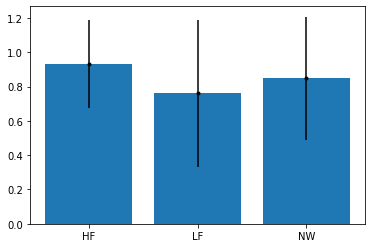

In [45]:
plt.figure()
plt.bar(summary_freq_category_all['freq_category'], summary_freq_category_all['mean_accuracy'])
plt.errorbar(summary_freq_category_all['freq_category'], summary_freq_category_all['mean_accuracy'], summary_freq_category_all['std_accuracy'], fmt='k.')
plt.show()

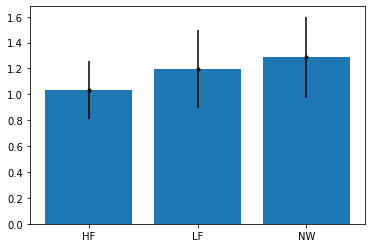

In [46]:
plt.figure()
plt.bar(summary_freq_category['freq_category'], summary_freq_category['mean_RT'])
plt.errorbar(summary_freq_category['freq_category'], summary_freq_category['mean_RT'], summary_freq_category['std_RT'], fmt='k.')
plt.show()

**2. visualizing results**

(looking only at correct trials)

diagnostic plot:

aggregate plot:

<AxesSubplot:xlabel='freq_category', ylabel='reaction_time'>

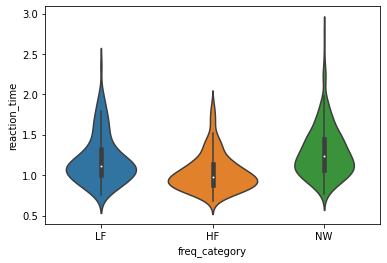

In [47]:
sns.violinplot(y="reaction_time", 
                x="freq_category", 
                data=only_acc)

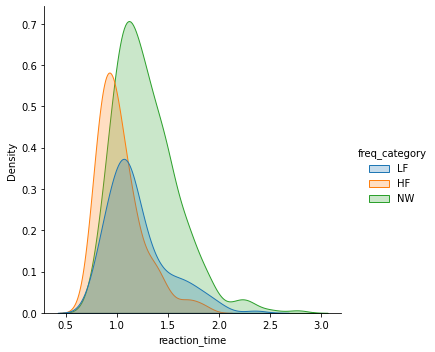

In [48]:
sns.displot(only_acc, x="reaction_time", hue="freq_category", kind="kde", fill=True)

**Should/could probably have taken stimulus duration into account for reaction_time measurement (now reaction time is quite long because it is measured from start of stimulus presentation + don't know whether stimuli are balanced in terms of duration), but ran out of time for now (might try some more later).**